In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
test_condition = 'Calibration With Cartridge'
instrument = 'Glacier'

In [3]:
filenames = ['Olympic_same_with_reagent.csv', 'Olympic_reseat.csv', 
             'Olympic_noswap_noreset.csv', 'Glacier_noswap_noreset.csv']

# filenames = ['Olympic_reseat.csv', 
#              'Olympic_noswap_noreset.csv', 'Glacier_noswap_noreset.csv']

df_list = []

for file in filenames:
    df = pd.read_csv(file)
    df_list.append(df)
#     df_cleaned = df.drop(columns=['fc_sensor_data', 'metadata'])
#     df_cleaned.to_csv("olympic_run_2.csv")
#     df.head()
#     print(df.columns)
df = pd.concat(df_list)
print(df.shape)

(9011, 26)


In [4]:
df.head()

,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
0,SBL (pre-production),Pre-Prime Flush 1000ul,Sequencing Run,calibrate,NaN,olympic,False,2020-10-02T18:54:34.263650-04:00,NaN,620b78d3-9d8b-499a-a236-4dbe76b3e3d9,...,{},10083.338164,8627.435201,83b5369f-e7aa-4622-9a04-f9d74ed83e0f,17,1455.902964,1000,H2O,0.035,True
1,SBL (pre-production),Prime check H2O prime_ul=2000 valve_num=17,Sequencing Run,calibrate,NaN,olympic,False,2020-10-02T18:54:51.569729-04:00,NaN,620b78d3-9d8b-499a-a236-4dbe76b3e3d9,...,{},13118.468479,10083.055130,eb4d493f-367f-457b-9f79-bb9eb381db4f,17,3035.413349,2000,H2O,0.035,True
2,SBL (pre-production),Pre-Prime Flush 1000ul,Sequencing Run,calibrate,NaN,olympic,False,2020-10-02T18:55:23.721669-04:00,NaN,620b78d3-9d8b-499a-a236-4dbe76b3e3d9,...,{},14335.357765,13118.195675,f5840110-b205-4b86-888f-b8229ba509fd,18,1217.162090,1000,WASH1E,0.035,True
3,SBL (pre-production),Prime check WASH1E prime_ul=2000 valve_num=18,Sequencing Run,calibrate,NaN,olympic,False,2020-10-02T18:55:41.385523-04:00,NaN,620b78d3-9d8b-499a-a236-4dbe76b3e3d9,...,{},16692.301135,14335.067911,12367524-8fcd-4e64-8579-72ddf4a1107d,18,2357.233223,2000,WASH1E,0.035,True
4,SBL (pre-production),Pre-Prime Flush 1000ul,Sequencing Run,calibrate,NaN,olympic,False,2020-10-02T18:57:07.211392-04:00,NaN,620b78d3-9d8b-499a-a236-4dbe76b3e3d9,...,{},10183.569706,8691.448623,2a99e6d1-b69c-48b6-944d-ea9ef38fc687,19,1492.121084,1000,_H2O19,0.035,True


In [5]:
df_runtime = df.loc[(df['device_task_top_level'] != 'Fluidics Calibration')
                    & (df['device_task_view_id'] != 'calibrate')
                    & (df['device_task_view_id'] != 'prep_reagents') 
                    & (df['dispense_type'] == 'reagent') 
                    & (df['volume_ul'] > 75)
                    & (df['reagent'] != 'H2O')]

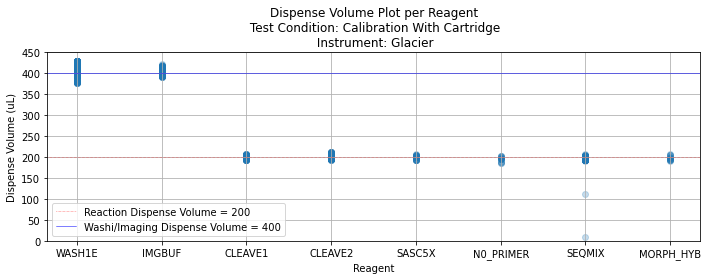

In [6]:
fig, ax = plt.subplots(figsize=(10,4))

ax.scatter(df_runtime['reagent'], df_runtime['weight_mg'], alpha=0.25)
ax.set(xlabel='Reagent', ylabel='Dispense Volume (uL)', 
       title='Dispense Volume Plot per Reagent'
       '\n Test Condition: {0}'
       '\n Instrument: {1}'.format(test_condition, instrument),
      ylim=(0,450))
ax.axhline(200, color='r', label='Reaction Dispense Volume = 200', linewidth=0.5, linestyle=':')
ax.axhline(400, color = 'b', label='Washi/Imaging Dispense Volume = 400', linewidth=0.5)
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
df_runtime.groupby('reagent').weight_mg.describe()

,count,mean,std,min,25%,50%,75%,max
reagent,,,,,,,,
CLEAVE1,96.0,200.773885,3.628822,192.865497,198.712025,201.080303,202.840024,207.717207
CLEAVE2,96.0,201.643954,5.212573,192.885958,197.919189,201.023492,204.478801,213.168924
IMGBUF,128.0,404.801258,7.808303,391.166612,397.751414,404.950026,409.273929,422.050013
MORPH_HYB,16.0,198.227530,5.131720,190.041978,194.088000,197.557724,201.827005,206.922214
N0_PRIMER,16.0,195.833391,5.722435,186.307975,193.591838,196.384667,200.223900,203.455066
SASC5X,32.0,199.715494,4.316607,192.210768,198.706057,200.688148,201.985671,206.263576
SEQMIX,80.0,194.707577,23.416492,8.917276,193.936253,197.634459,201.786183,206.440899
WASH1E,3476.0,412.338438,10.333811,375.845266,403.684633,407.811056,421.689099,430.215072


In [8]:
sums = df_runtime.groupby('reagent', as_index=False).sum()

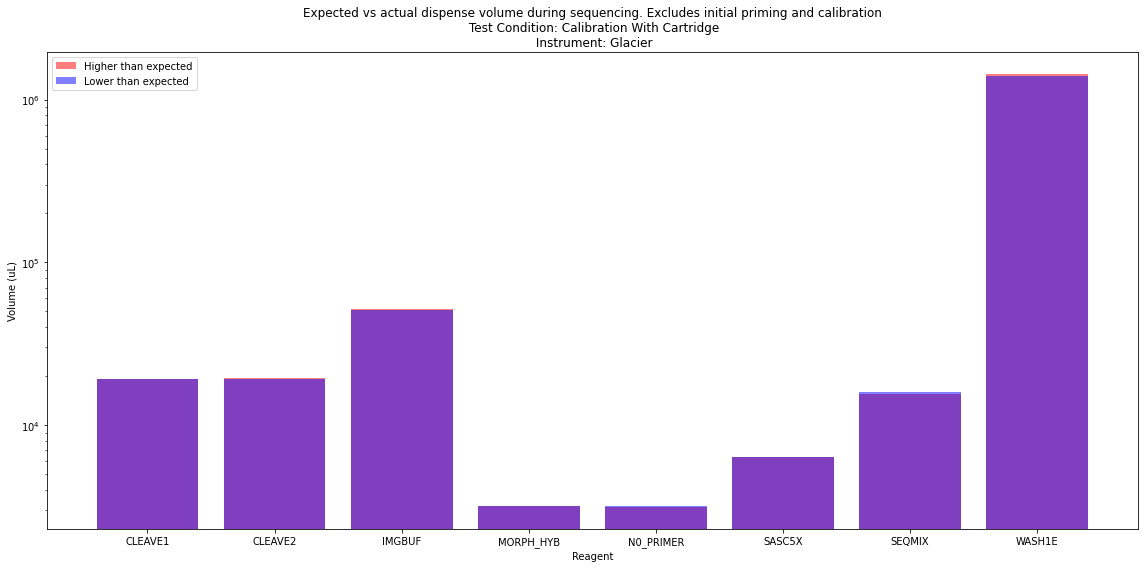

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['weight_mg'], color='r', alpha=0.5, label='Higher than expected')
ax.bar(sums['reagent'], sums['volume_ul'], color='b', alpha=0.5, label='Lower than expected')
ax.set(xlabel='Reagent', ylabel='Volume (uL)', 
       title='Expected vs actual dispense volume during sequencing. Excludes initial priming and calibration'
       '\n Test Condition: {0}'
       '\n Instrument: {1}'.format(test_condition, instrument), yscale='log')
# ax.set_xticklabels(sums['reagent'], rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

In [10]:
sums['per_error'] = (sums['weight_mg'] - sums['volume_ul']) / sums['volume_ul']

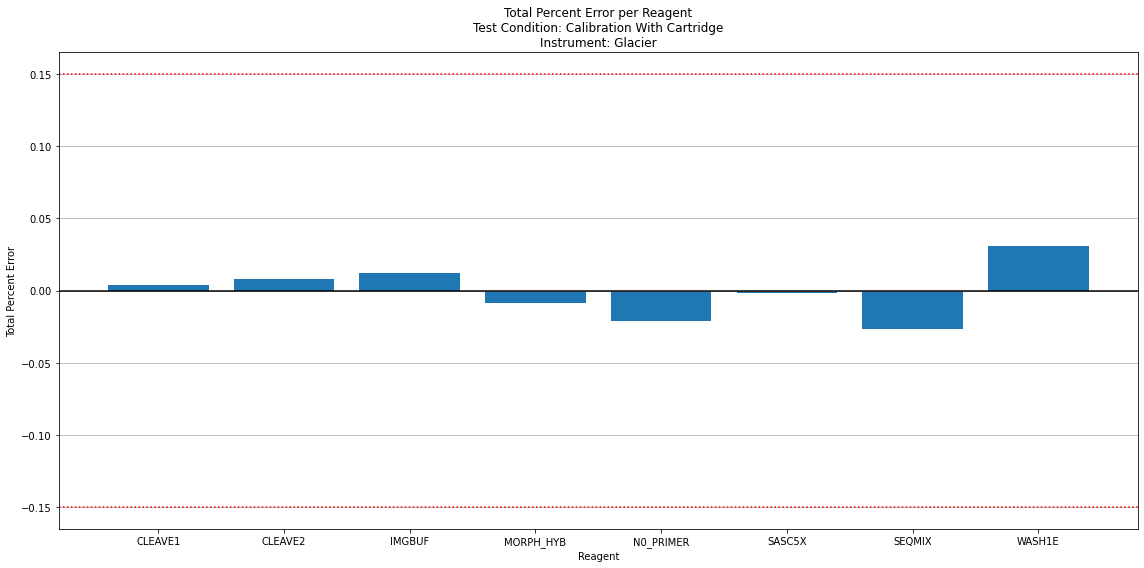

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['per_error'])
ax.axhline(0.15, color='r', linestyle=':')
ax.axhline(-0.15, color='r', linestyle=':')
ax.axhline(0, color='k', linestyle='-')
# ax.set_xticklabels(sums['reagent'], rotation=45)
ax.set(xlabel='Reagent', ylabel='Total Percent Error', 
       title='Total Percent Error per Reagent'
      '\nTest Condition: {0}'
      '\nInstrument: {1}'.format(test_condition, instrument))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

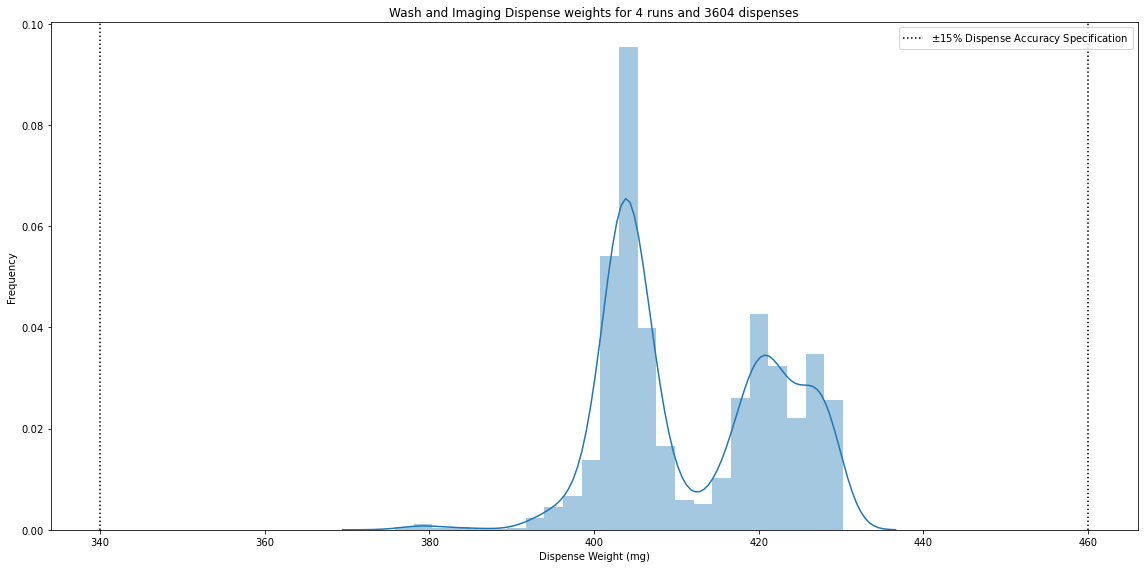

In [12]:
wash_df = df_runtime.loc[(df_runtime['reagent'] == 'WASH1E') | (df_runtime['reagent'] == 'IMGBUF')].copy()

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.distplot(wash_df['weight_mg'])
ax.axvline(340, color='k', linestyle=':', label=r'$\pm 15 \%$ Dispense Accuracy Specification')
ax.axvline(460, color='k', linestyle=':')
ax.set(xlabel='Dispense Weight (mg)', ylabel='Frequency', 
       title='Wash and Imaging Dispense weights for {0} runs and {1} dispenses'.format(len(filenames), wash_df.shape[0]))
ax.legend()
plt.tight_layout()
plt.show()

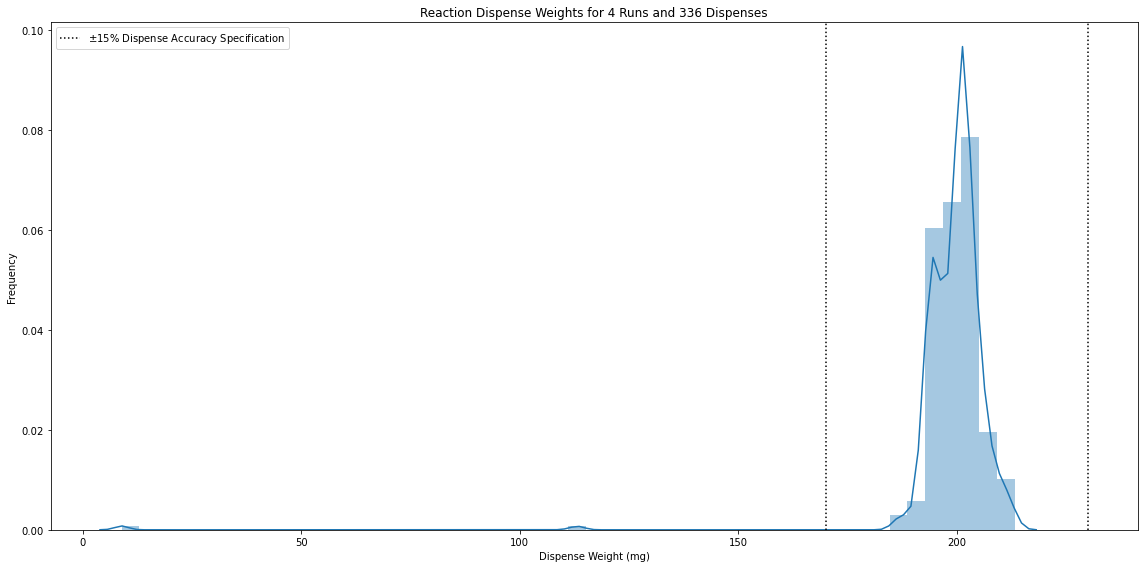

In [13]:
react_df = df_runtime.loc[(df_runtime['reagent'] != 'WASH1E') & (df_runtime['reagent'] != 'IMGBUF')].copy()
# react_df['reagent'].unique()
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.distplot(react_df['weight_mg'])
ax.axvline(170, color='k', linestyle=':', label=r'$\pm 15 \%$ Dispense Accuracy Specification')
ax.axvline(230, color='k', linestyle=':')
ax.set(xlabel='Dispense Weight (mg)', ylabel='Frequency', 
       title='Reaction Dispense Weights for {0} Runs and {1} Dispenses'.format(len(filenames), react_df.shape[0]))
ax.legend()
plt.tight_layout()
plt.show()

In [14]:
bad_wash_df = wash_df.loc[(wash_df['weight_mg'] <= 340) | (wash_df['weight_mg'] >= 460)].copy()
bad_react_df = react_df.loc[(react_df['weight_mg'] <= 170) | (react_df['weight_mg'] >= 230)].copy()

No handles with labels found to put in legend.


Int64Index([], dtype='int64')


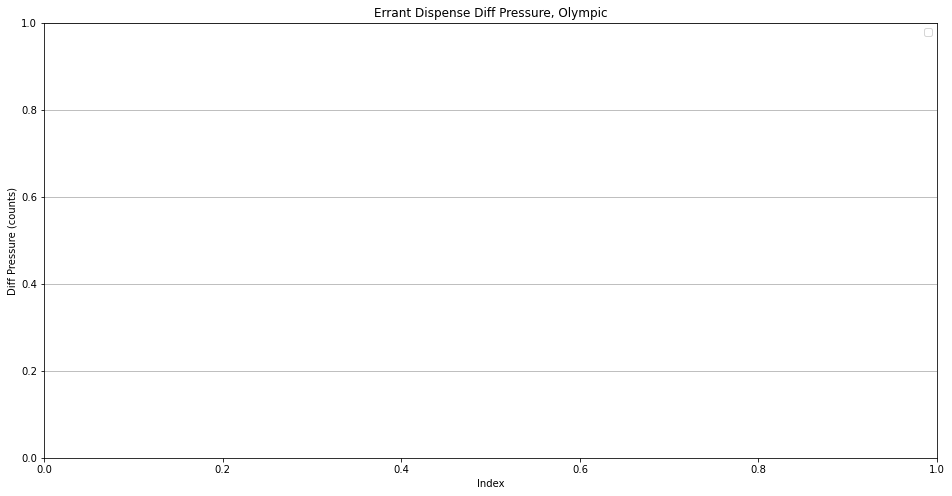

In [15]:
dispenses_full = []
dispense_weight = []
dispense_index = bad_wash_df.index
for i in range(len(bad_wash_df)):
    dict_string = bad_wash_df['fc_sensor_data'].iloc[i]
    dispenses_full.append(ast.literal_eval(dict_string))
    dispense_weight.append(bad_wash_df['weight_mg'].iloc[i])
print(dispense_index)

all_dispense = []    
for dispense in dispenses_full:
#     print(dispense)
    single_dispense = []
    for point in dispense:
#         print(point[1])
        try:
            single_dispense.append(-1 * point[1]['state']['diff_pressure'])
        except KeyError:
            pass
#     print(single_dispense)
    all_dispense.append(single_dispense)


fig, ax = plt.subplots(figsize=(16,8))
for dispense, weight, number in zip(all_dispense, dispense_weight, dispense_index):
    ax.plot(range(len(dispense)), dispense, 
            label='Dispense {0}, Volume: {1:.2f}'.format(number + 1, weight))
ax.set(xlabel='Index', ylabel='Diff Pressure (counts)', title='Errant Dispense Diff Pressure, Olympic')
ax.legend()
plt.grid(axis='y')
plt.show()

Int64Index([1616, 1617], dtype='int64')
Int64Index([ 300,  301,  302,  303,  307,  308,  309,  310,  335,  336,
            ...
            1999, 2000, 2025, 2026, 2027, 2028, 2032, 2033, 2034, 2035],
           dtype='int64', length=336)


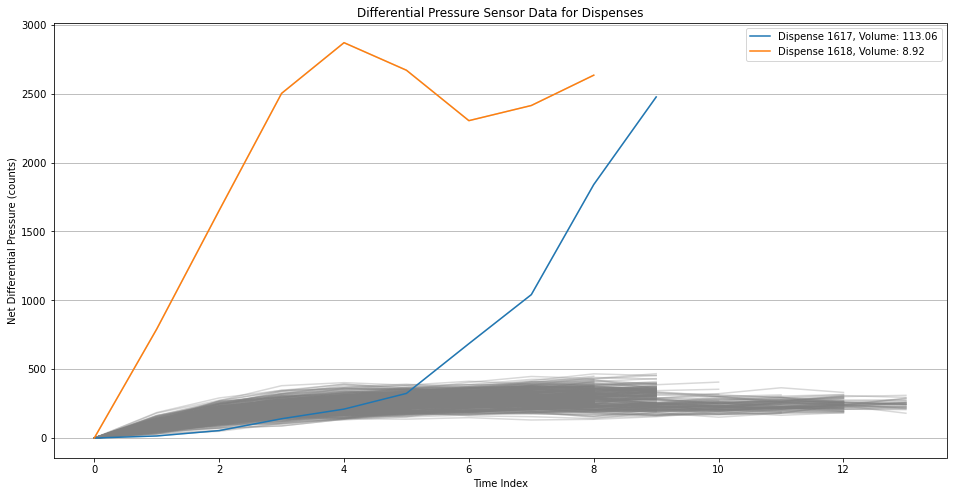

In [16]:
dispenses_full_bad = []
dispense_weight_bad = []
dispense_index_bad = bad_react_df.index
for i in range(len(bad_react_df)):
    dict_string = bad_react_df['fc_sensor_data'].iloc[i]
    dispenses_full_bad.append(ast.literal_eval(dict_string))
    dispense_weight_bad.append(bad_react_df['weight_mg'].iloc[i])
print(dispense_index_bad)

all_dispense_bad = []    
for dispense in dispenses_full_bad:
#     print(dispense)
    single_dispense = []
    for point in dispense:
#         print(point[1])
        try:
            single_dispense.append(-1 * point[1]['state']['diff_pressure'])
        except KeyError:
            pass
        
    baseline=single_dispense[0]
    for i in range(len(single_dispense)):
        single_dispense[i] = single_dispense[i] - baseline
#     print(single_dispense)
    all_dispense_bad.append(single_dispense)
    

dispenses_full = []
dispense_weight = []
dispense_index = react_df.index
for i in range(len(react_df)):
    dict_string = react_df['fc_sensor_data'].iloc[i]
    dispenses_full.append(ast.literal_eval(dict_string))
    dispense_weight.append(react_df['weight_mg'].iloc[i])
print(dispense_index)

all_dispense = []    
for dispense in dispenses_full:
#     print(dispense)
    single_dispense = []
    for point in dispense:
#         print(point[1])
        try:
            single_dispense.append(-1 * point[1]['state']['diff_pressure'])
        except KeyError:
            pass
#     print(single_dispense)
    baseline=single_dispense[0]
    for i in range(len(single_dispense)):
        single_dispense[i] = single_dispense[i] - baseline
    all_dispense.append(single_dispense)


fig, ax = plt.subplots(figsize=(16,8))
for dispense, weight, number in zip(all_dispense, dispense_weight, dispense_index):
    ax.plot(range(len(dispense)), dispense, alpha=0.3, color='grey')
for dispense, weight, number in zip(all_dispense_bad, dispense_weight_bad, dispense_index_bad):
    ax.plot(range(len(dispense)), dispense, 
            label='Dispense {0}, Volume: {1:.2f}'.format(number + 1, weight))

    
ax.set(xlabel='Time Index', ylabel='Net Differential Pressure (counts)', 
       title='Differential Pressure Sensor Data for Dispenses')
ax.legend()
plt.grid(axis='y')
plt.show()

In [17]:
df_rtno = df_runtime.drop(bad_react_df.index).copy()

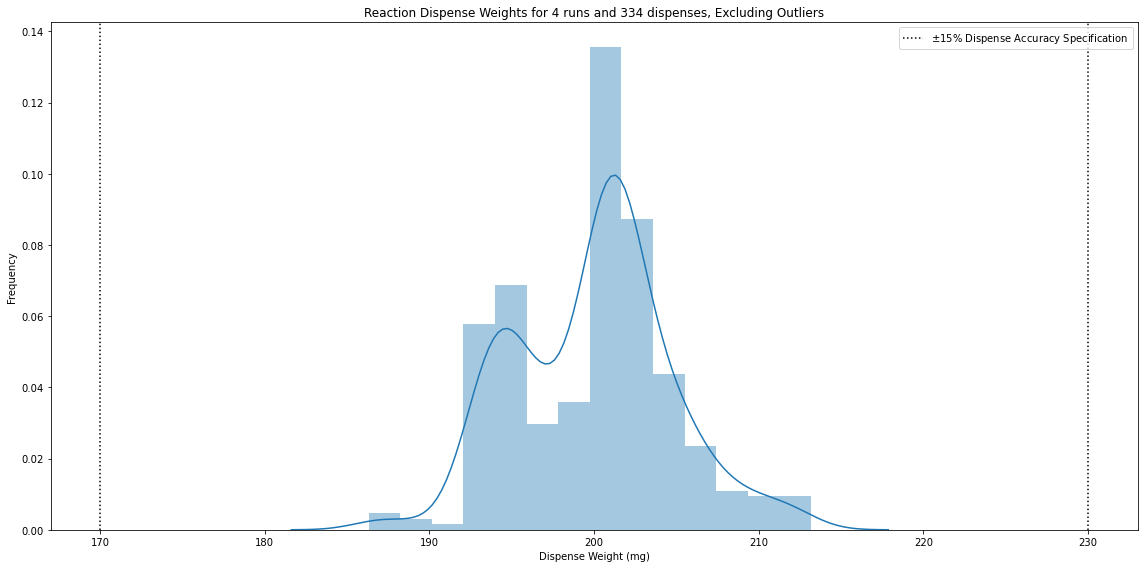

In [18]:
react_df = df_rtno.loc[(df_rtno['reagent'] != 'WASH1E') & (df_rtno['reagent'] != 'IMGBUF')].copy()

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.distplot(react_df['weight_mg'])
ax.axvline(170, color='k', linestyle=':', label=r'$\pm 15 \%$ Dispense Accuracy Specification')
ax.axvline(230, color='k', linestyle=':')
ax.set(xlabel='Dispense Weight (mg)', ylabel='Frequency', 
       title='Reaction Dispense Weights for {0} runs and {1} dispenses, Excluding Outliers'.format(len(filenames), react_df.shape[0]))

ax.legend()
plt.tight_layout()
plt.show()
# print(react_df.shape)

Int64Index([ 300,  301,  302,  303,  307,  308,  309,  310,  335,  336,
            ...
            1999, 2000, 2025, 2026, 2027, 2028, 2032, 2033, 2034, 2035],
           dtype='int64', length=334)


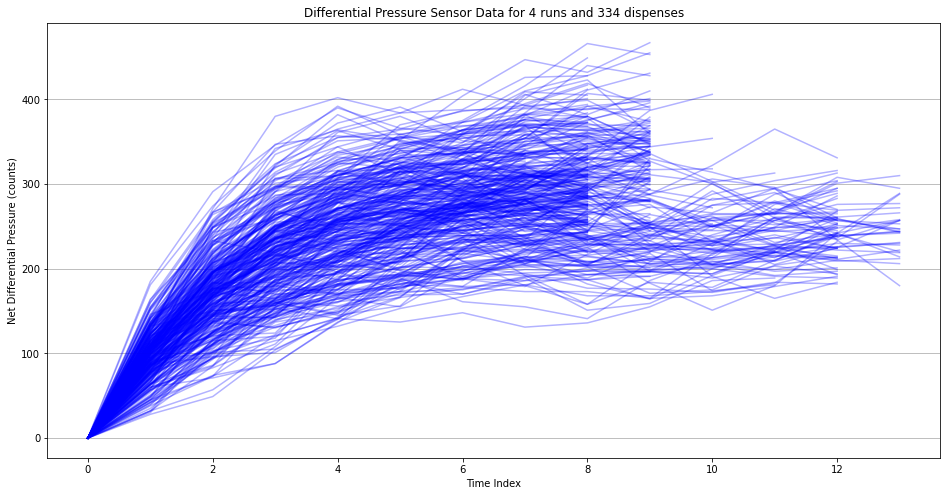

In [19]:
dispenses_full = []
dispense_weight = []
dispense_index = react_df.index
for i in range(len(react_df)):
    dict_string = react_df['fc_sensor_data'].iloc[i]
    dispenses_full.append(ast.literal_eval(dict_string))
    dispense_weight.append(react_df['weight_mg'].iloc[i])
print(dispense_index)

all_dispense = []    
for dispense in dispenses_full:
#     print(dispense)
    single_dispense = []
    for point in dispense:
#         print(point[1])
        try:
            single_dispense.append(-1 * point[1]['state']['diff_pressure'])
        except KeyError:
            pass
#     print(single_dispense)
    baseline=single_dispense[0]
    for i in range(len(single_dispense)):
        single_dispense[i] = single_dispense[i] - baseline
    all_dispense.append(single_dispense)


    
fig, ax = plt.subplots(figsize=(16,8))
for dispense, weight, number in zip(all_dispense, dispense_weight, dispense_index):
    ax.plot(range(len(dispense)), dispense, 
            label='Dispense {0}, Volume: {1:.2f}'.format(number + 1, weight), alpha=0.3, color='b')
ax.set(xlabel='Time Index', ylabel='Net Differential Pressure (counts)', 
       title='Differential Pressure Sensor Data for {0} runs and {1} dispenses'.format(len(filenames), react_df.shape[0]))
# ax.legend()
plt.grid(axis='y')
plt.show()

In [24]:
df_list = []
wash_df['weight_mg'] = wash_df['weight_mg'] * 0.5
df_list.append(react_df)
df_list.append(wash_df)

cleaned_df = pd.concat(df_list)
cleaned_df.shape

(3938, 26)

In [26]:
cleaned_df.to_csv('cleaned_dispenses.csv')